In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Set file path and create dataframe
meta_info = pd.DataFrame(pd.read_csv('../Resources/metacritic_game_info.csv'))

# Set index to game title
meta_info = meta_info.dropna().set_index('Title')

# Display first five rows
meta_info.head()

,Unnamed: 0,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players
Title,,,,,,,,
The Legend of Zelda: Ocarina of Time,0,1998,Nintendo,Action Adventure;Fantasy,Nintendo64,99,9.1,1 Player
Tony Hawk's Pro Skater 2,1,2000,NeversoftEntertainment,Sports;Alternative;Skateboarding,PlayStation,98,7.4,1-2
Grand Theft Auto IV,2,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,PlayStation3,98,7.5,1 Player
SoulCalibur,3,1999,Namco,Action;Fighting;3D,Dreamcast,98,8.6,1-2
Grand Theft Auto IV,4,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,Xbox360,98,7.9,1 Player


In [4]:
# Set 'Metascore' and 'Avg_Userscore' to float64 from object type
meta_info["Metascore"] = pd.to_numeric(meta_info["Metascore"],errors='coerce')
meta_info["Avg_Userscore"] = pd.to_numeric(meta_info["Avg_Userscore"],errors='coerce')

# Check
meta_info.dtypes

Unnamed: 0         int64
Year              object
Publisher         object
Genre             object
Platform          object
Metascore        float64
Avg_Userscore    float64
No_Players        object
dtype: object

In [7]:
# Create series from 'Metascore'
meta = meta_info['Metascore']

# Create new dataframe from meta series and add
scores = pd.DataFrame(meta)

# Add column 'Userscore' 
# 'Avg_Userscore' multipled by 10 to create a Userscore comparable to Metascore
scores['Userscore'] = meta_info['Avg_Userscore']*10

# Add column 'Score Difference' 
# The absolute value of the difference between 'Metascore' and 'Userscore'
scores['Score Difference'] = abs(scores['Metascore'] - scores['Userscore'])

# Sort of the 'Score Difference' (descending) and disply first and last rows
scores = scores.sort_values('Score Difference',ascending=False).head(20)
scores

,Metascore,Userscore,Score Difference
Title,,,
NBA 2K18,85.0,16.0,69.0
NBA 2K18,80.0,17.0,63.0
Company of Heroes 2,80.0,21.0,59.0
Out of the Park Baseball 17,92.0,34.0,58.0
Call of Duty: Modern Warfare 3,88.0,32.0,56.0
LostWinds: Winter of the Melodias,86.0,31.0,55.0
Call of Duty: Modern Warfare 3,88.0,34.0,54.0
FIFA 18,81.0,27.0,54.0
Madden NFL 19,80.0,27.0,53.0


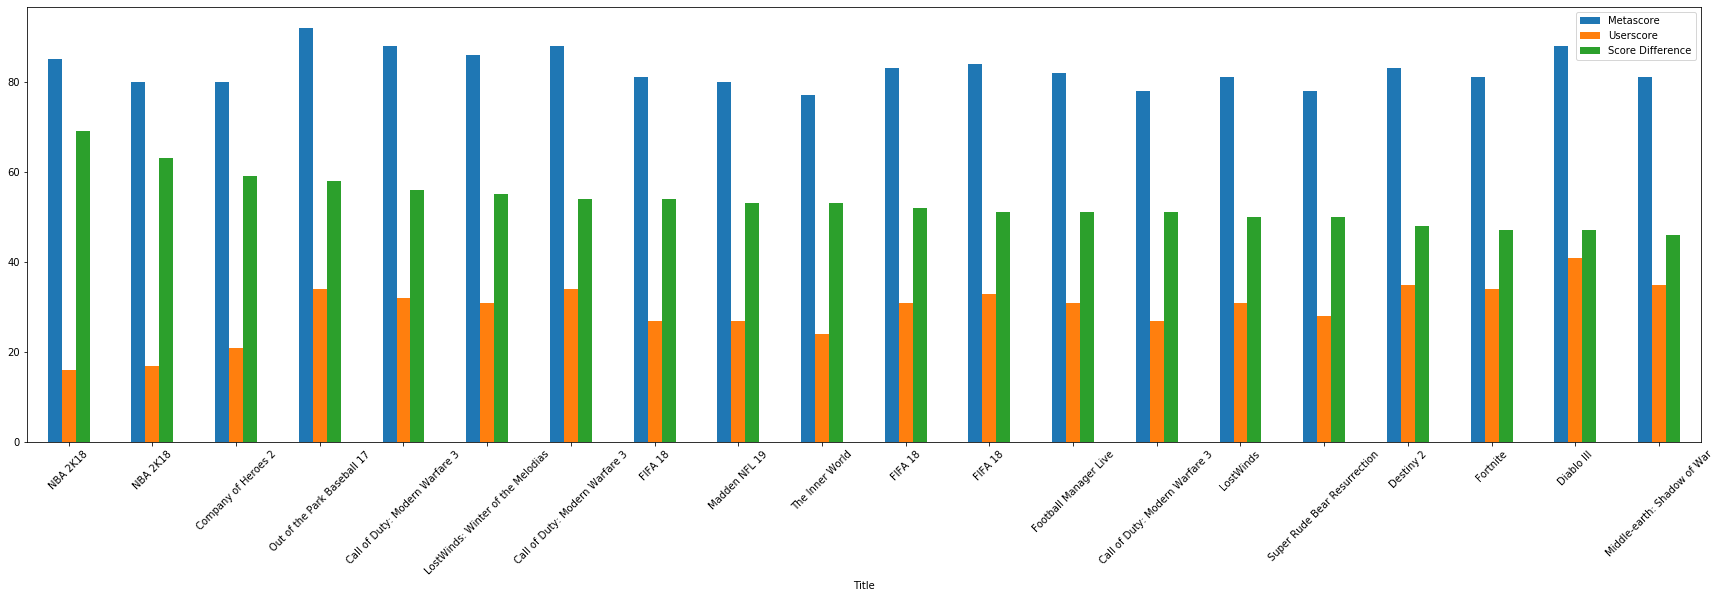

In [8]:
# Plot a bar graph of the above data using Pandas
score_graph = scores.plot(kind='bar',figsize=(30,8))
plt.xticks(rotation=45)
score_graph
# plt.savefig('MetaScoreDiff.png')